In [1]:
import numpy as np  #lineer cebir vs. işlemleri yapar.
import pandas as pd #verileri tek bir satır kodla okutmaya yarar.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") #Uyarıları görmemizi sağlıyor

In [2]:
df=pd.read_csv('supermarket.csv') 

In [3]:
dir(pd) #pandas ile ilgili kullanabileceğimiz komutları gösterir.

['BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_hashtable',
 '_is_numpy_dev',
 '_lib',
 '_libs',
 '_np_version_under1p14',
 '_np_version_under1p15',
 '_np_version_under1p16',
 '_np_version_under1p17',
 '_

### Exploratory Data Anlaysis -EDA

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.tail() #son 5 satır

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
df.info()
# Maliyet fiyatı = cogs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.isnull().sum() #Kaç tane boş veri var onu gösterir. Gözüktüğü gibi boş veri yok.

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df.sample()  #Verileri rastgele çeker. İçerisine kaç tane değer girilirse o kadar rastgele veri getirir bize. Boş bırakırsak bir tane getirir karşımıza.

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
335,527-09-6272,A,Yangon,Member,Female,Electronic accessories,28.45,5,7.1125,149.3625,3/21/2019,10:17,Credit card,142.25,4.761905,7.1125,9.1


In [9]:
df["City"].unique() #Kaç tane unique değer var(yani tekrar eden veri)  

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [10]:
df["City"].nunique()

3

In [11]:
df['Branch'].nunique() #nunique(sayısını veriyor.)

3

In [12]:
df["Branch"].unique()

array(['A', 'C', 'B'], dtype=object)

In [13]:
df.Total.max() # Bir kişinin bir seferde yaptığı maksimum harcama 
# Bu tarz gösterimi aralarında boşluk olan veriler için yapamayız. (Unit Price, Customer Type gibi) 
# Bu ad tanımlamasında boşluk olan veriler için aşağıdaki gibi köşeli parantez kullanılır.

1042.65

In [14]:
df['Total'].max() # Yukarıda ki kodla aynı 

1042.65

In [15]:
df['Total'].max(), df["Total"].std(), df['Total'].var(), df["Total"].mean, df["Total"].median() #std standart sapma.

(1042.65,
 245.88533510097207,
 60459.598017717326,
 <bound method Series.mean of 0       548.9715
 1        80.2200
 2       340.5255
 3       489.0480
 4       634.3785
          ...    
 995      42.3675
 996    1022.4900
 997      33.4320
 998      69.1110
 999     649.2990
 Name: Total, Length: 1000, dtype: float64>,
 253.848)

In [16]:
df.describe()  #Bütün verileri veriyor.

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [17]:
#Feature Engineering (Öznitelik Mühendisliği)
# Var olan veriden yeni veriler oluşturma.

In [18]:
df["Date"]=pd.to_datetime(df["Date"])  
#Date sütunu yukarıda object olarak tanınıyor fakat date'i datetime olarak tanımlamamız lazım. Bunu datetime sayesinde yapıyoruz.

In [19]:
df["day"]=(df["Date"]).dt.day #Burada tarih içerisinden day'i çektik
df["month"]=(df["Date"]).dt.month #Burada tarih içerisinden month'ı çektik
df["year"]=(df["Date"]).dt.year  #Burada tarih içerisinden year'ı çektik
#dt pandasın içerisinde zaten var(hazır kod)

In [20]:
df.head() 
#(Burada görüldüğü gibi day, month, year ayrı olarak eklendi.)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


In [21]:
df["month_name"] = df["Date"].dt.month_name()  #dt.month_name dediğimizde ay adını verir.

In [22]:
df["month_name"] # Burada görüldüğü üzere yukarıda ki kodla hangi müşterinin hangi ayda alışveriş yaptığını gördük.

0       January
1         March
2         March
3       January
4      February
         ...   
995     January
996       March
997    February
998    February
999    February
Name: month_name, Length: 1000, dtype: object

In [23]:
df["weekday"] = df["Date"].dt.day_name()

In [24]:
df["weekday"] 
#Burada görüldüğü üzere yukarıda ki kodla hangi müşterinin hangi günde alışveriş yaptığını gördük.

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: weekday, Length: 1000, dtype: object

In [25]:
df["Time"] = pd.to_datetime(df["Time"])

In [26]:
df["Time"]
#Burada görüldüğü üzere yukarıda ki kodla hangi müşterinin ne zaman ve hangi saatte alışveriş yaptığını gördük.

0     2021-12-05 13:08:00
1     2021-12-05 10:29:00
2     2021-12-05 13:23:00
3     2021-12-05 20:33:00
4     2021-12-05 10:37:00
              ...        
995   2021-12-05 13:46:00
996   2021-12-05 17:16:00
997   2021-12-05 13:22:00
998   2021-12-05 15:33:00
999   2021-12-05 13:28:00
Name: Time, Length: 1000, dtype: datetime64[ns]

In [27]:
df['Hour'] =(df["Time"]).dt.hour   #Hangi günün hangi saatinde ne kadar satış yapıyor.

In [28]:
df['Hour']

0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: Hour, Length: 1000, dtype: int64

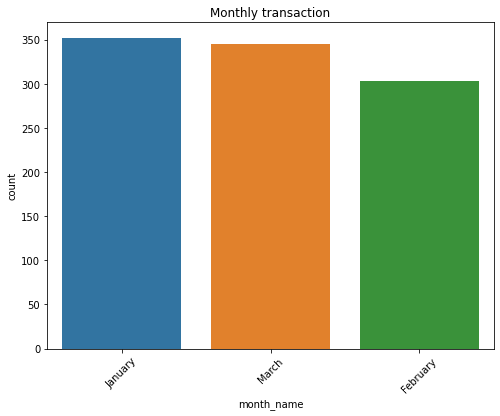

In [29]:
plt.figure(figsize=(8,6))  #Eni 8 boyu 6 inç. 
plt.title("Monthly transaction")
sns.countplot(df["month_name"])
plt.xticks(rotation=45);     
#rotation verilerin altındaki yazıları içindeki açı ile yazar(January, March, February)

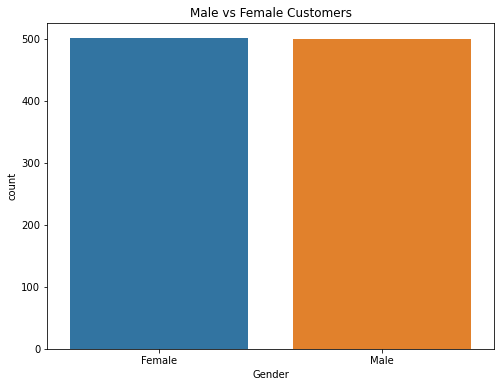

In [30]:
plt.figure(figsize=(8,6))
plt.title("Male vs Female Customers")
sns.countplot(df["Gender"]);  #Erkek ve kadın ayrımına göre alışveriş yapanları listeler.

In [31]:
df["month_name"].value_counts() # Hangi ay ne kadar satış yapılmış

January     352
March       345
February    303
Name: month_name, dtype: int64

In [32]:
df["Gender"].value_counts()  # Cinsiyetlerden kaç kişinin alışveriş yaptığının sayısını verir.

Female    501
Male      499
Name: Gender, dtype: int64

In [33]:
df["weekday"].value_counts() # Hangi gün ne kadar satış yapılmış. Bunun altta grafiğini yapıyoruz.

Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: weekday, dtype: int64

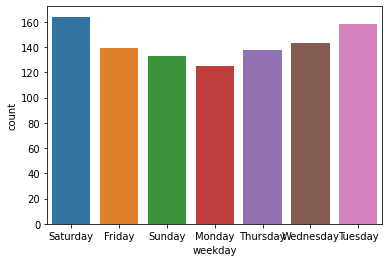

In [34]:
sns.countplot(df["weekday"]);   #Burada bir üst satırda ki kodu grafiğe döktük.
#sns(seaborn) daha iyi grafikler ve tek satırda grafik verir. Aşağıda günler birbirine geçti. Bunu aşağıdaki kodda düzelteceğiz.

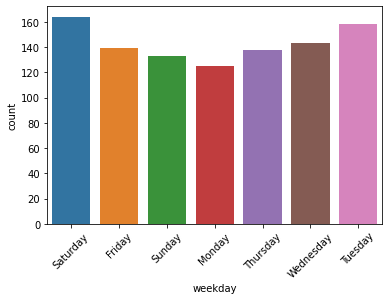

In [35]:
sns.countplot(df["weekday"]); 
plt.xticks(rotation=45); #Görüldüğü üzere günleri 45 derece açı ile çevirdik.

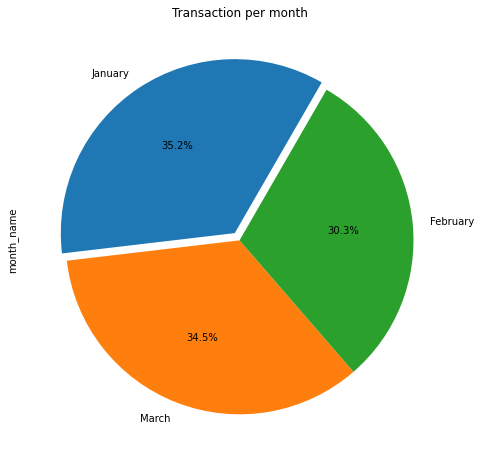

In [36]:
plt.figure(figsize=(8, 8))
explode=(0.05,0,0) #Burada en büyük veriyi ayırdık. Aynı şekilde diğerlerini de ayırabiliriz.
df['month_name'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60,explode=explode)
#autopct = grafik üzerinde yazı yazmamızı sağlar.(35.2%,30.3% vs.)
plt.title('Transaction per month');

#pay chart(Pasta grafik)

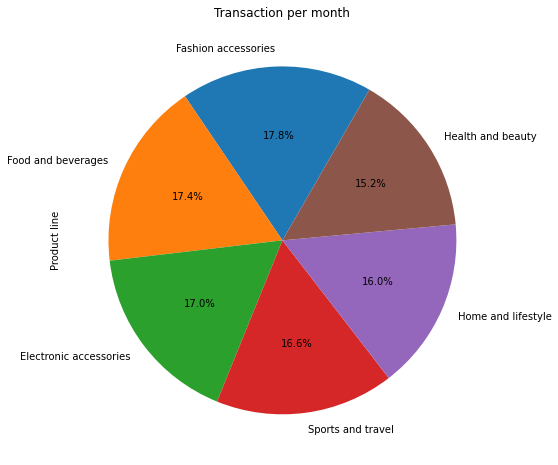

In [37]:
plt.figure(figsize=(8, 8))
explode=(0.1,0.05,0.05) 
df['Product line'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)#Burada hangi üründen en çok satılmış onu verir.
plt.title('Transaction per month');

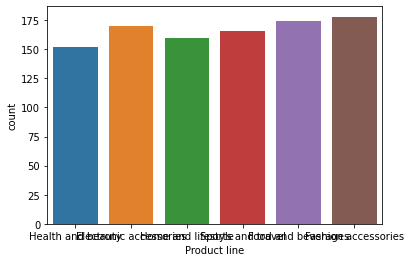

In [38]:
sns.countplot(df["Product line"]);   #Görüldüğü gibi yine yazılar iç içe girdi. (Aşağıdaki kod'da düzeltiyoruz.)

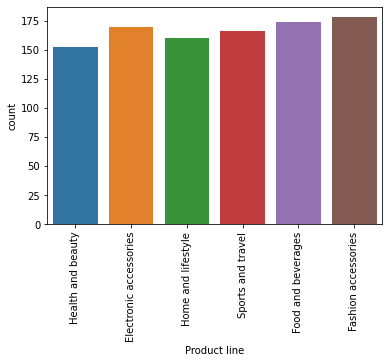

In [39]:
sns.countplot(df["Product line"]); 
plt.xticks(rotation=90);        #Görüldüğü gibi ürün isimlerini 90 derece ile yazdık.

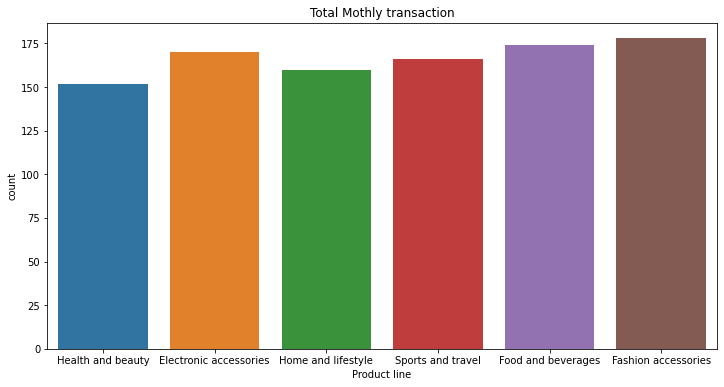

In [40]:
plt.figure(figsize=(12,6))
plt.title("Total Mothly transaction")
sns.countplot(df["Product line"]);

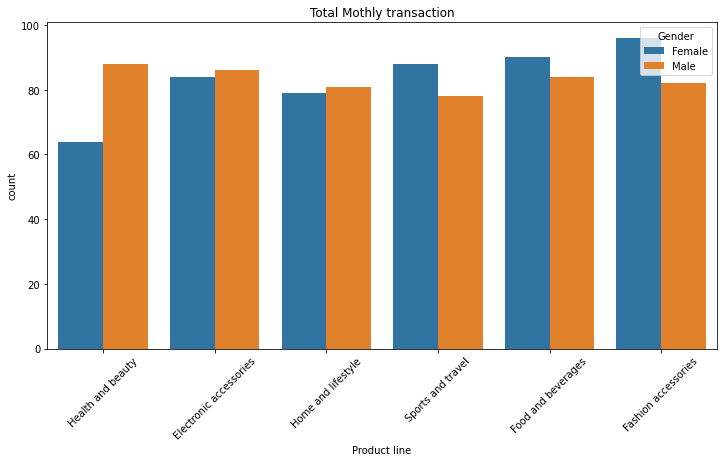

In [41]:
plt.figure(figsize=(12,6))
plt.title("Total Mothly transaction")
sns.countplot(df["Product line"], hue=df.Gender) #hangi ürünü hangi cinsiyet daha fazla almış. 
#hue girilen veriye göre renklendirdi(Gender=Female(Blue),Male(Orange))
plt.xticks(rotation=45);

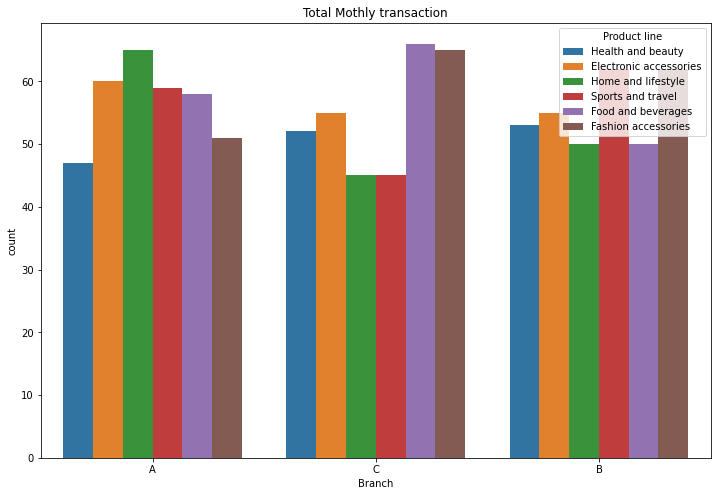

In [42]:
plt.figure(figsize=(12,8))
plt.title('Total Mothly transaction')
sns.countplot(df["Branch"],hue=df["Product line"]); #Burada da hangi üründen hangi şubede ne kadar alınmış.

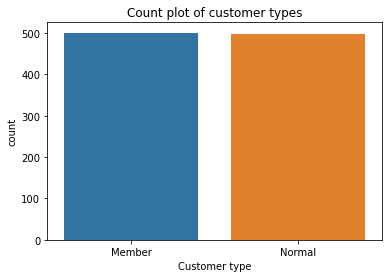

In [43]:
plt.title("Count plot of customer types")
sns.countplot(df["Customer type"]);          # Müşteri türlerini veren grafik.

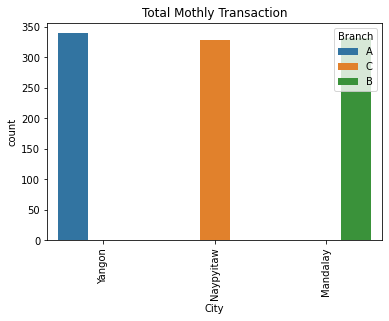

In [44]:
plt.title("Total Mothly Transaction")
sns.countplot(df["City"], hue=df["Branch"]);  #Her şehirdeki satış sayısına bakıyoruz.
plt.xticks(rotation=90);

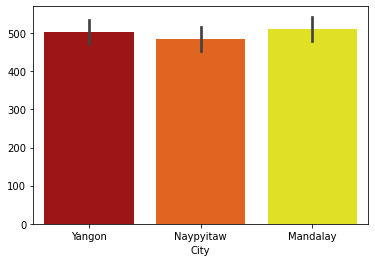

In [45]:
sns.barplot(x=df["City"] , y=df.index , palette="hot"); # Burada şehire göre ne kadar ürün satıldı onu buldu.
#index numarasına göre ürün saydı.  palette renk ile ilgili.

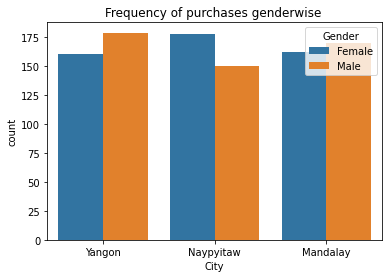

In [46]:
plt.title("Frequency of purchases genderwise ")
sns.countplot(df["City"],hue=df["Gender"]);

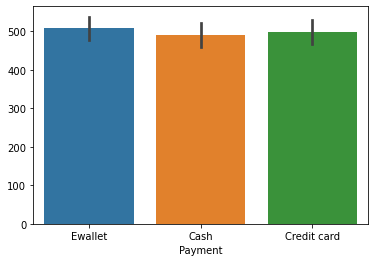

In [47]:
sns.barplot(x =df.Payment, y =df.index);

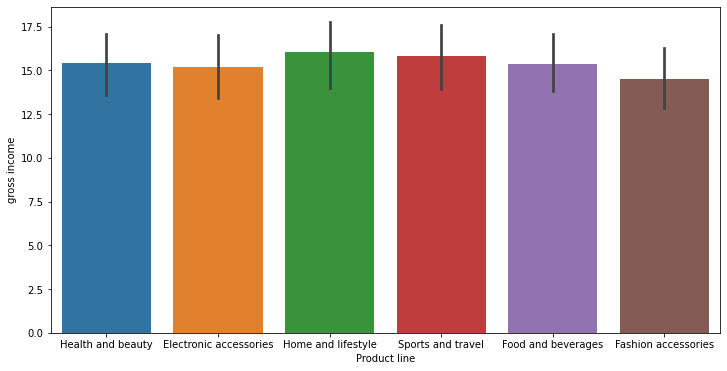

In [48]:
plt.figure(figsize= (12,6))
sns.barplot(x = df['Product line'], y = df['gross income']);

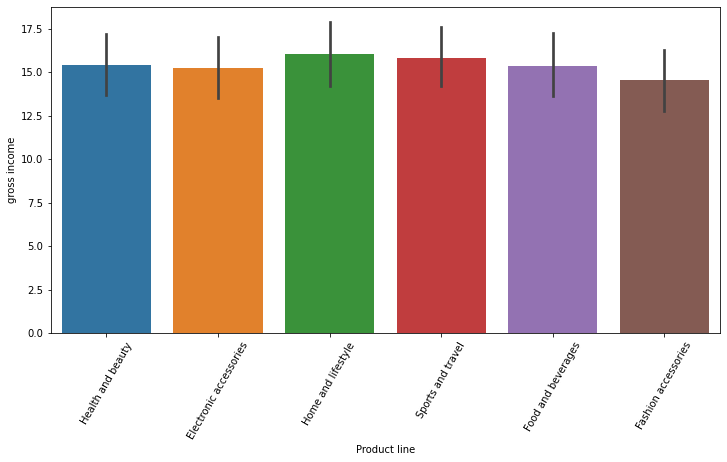

In [49]:
plt.figure(figsize= (12,6))
sns.barplot(x = df['Product line'], y = df['gross income']);
plt.xticks(rotation=60);

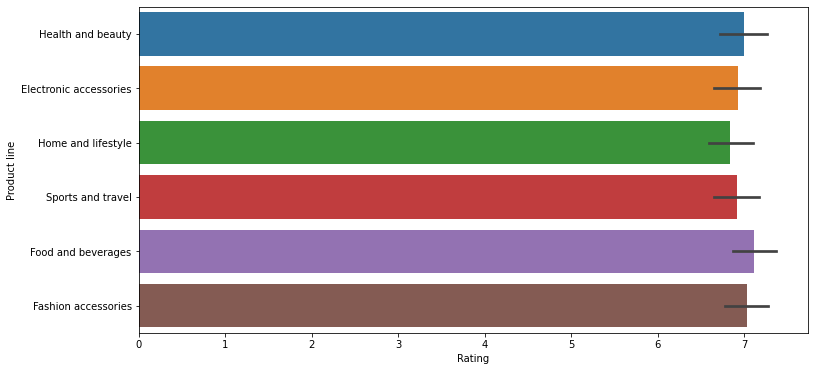

In [50]:
plt.figure(figsize = (12,6))
sns.barplot(y = df['Product line'], x = df['Rating'])

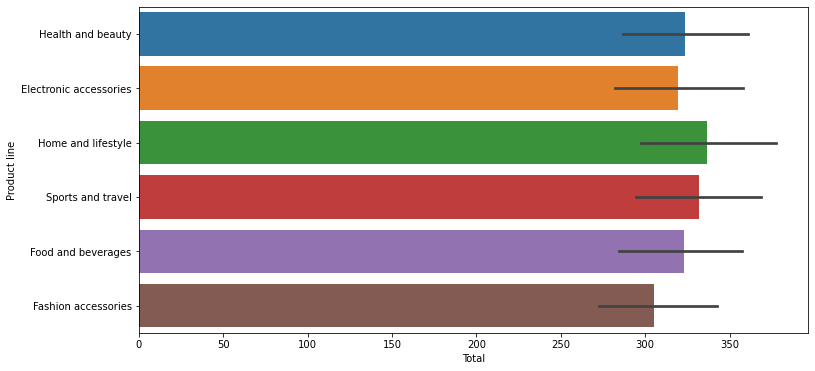

In [51]:
plt.figure(figsize = (12,6))
sns.barplot(x = df['Total'] , y = df['Product line']);

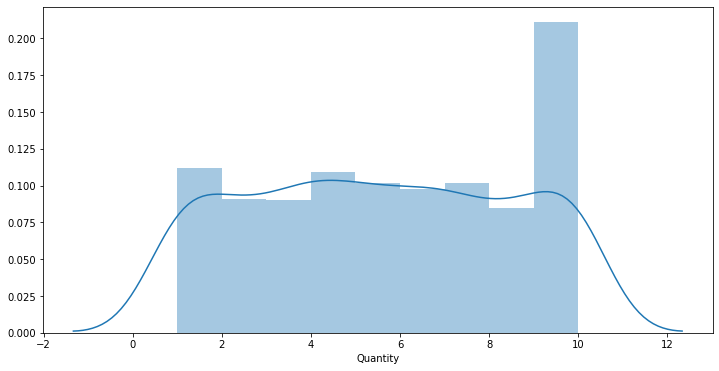

In [52]:
plt.figure(figsize = (12,6))
sns.distplot(df['Quantity']);

In [53]:
df['Hour'].nunique()  #benzersiz saatlerin sayısını alıyoruz.

11

In [54]:
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

In [55]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


In [56]:
df['weekday'].unique()

array(['Saturday', 'Friday', 'Sunday', 'Monday', 'Thursday', 'Wednesday',
       'Tuesday'], dtype=object)

Text(0.5, 1.0, 'Ratings by Branch')

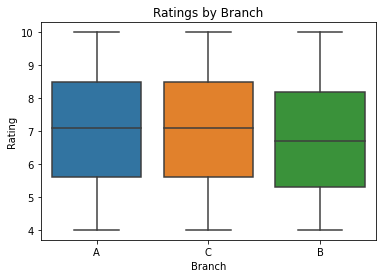

In [57]:
sns.boxplot(x="Branch", y = "Rating" ,data =df).set_title("Ratings by Branch")

Text(0.5, 1.0, 'Product Sales per Hour')

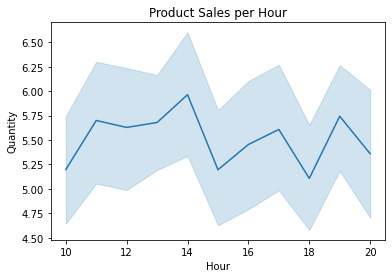

In [58]:
sns.lineplot(x="Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")

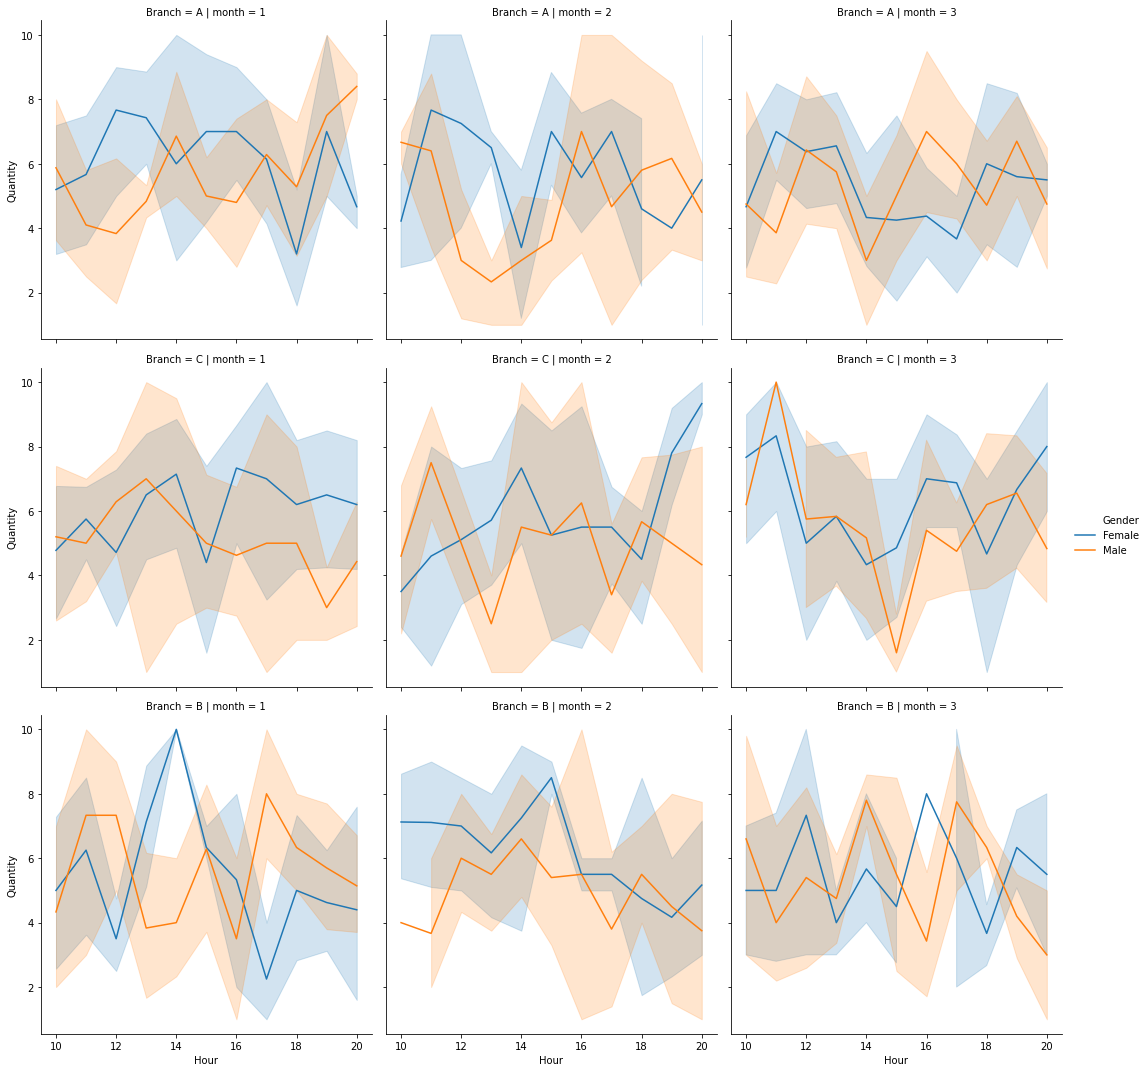

In [59]:
sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender",  data =df)

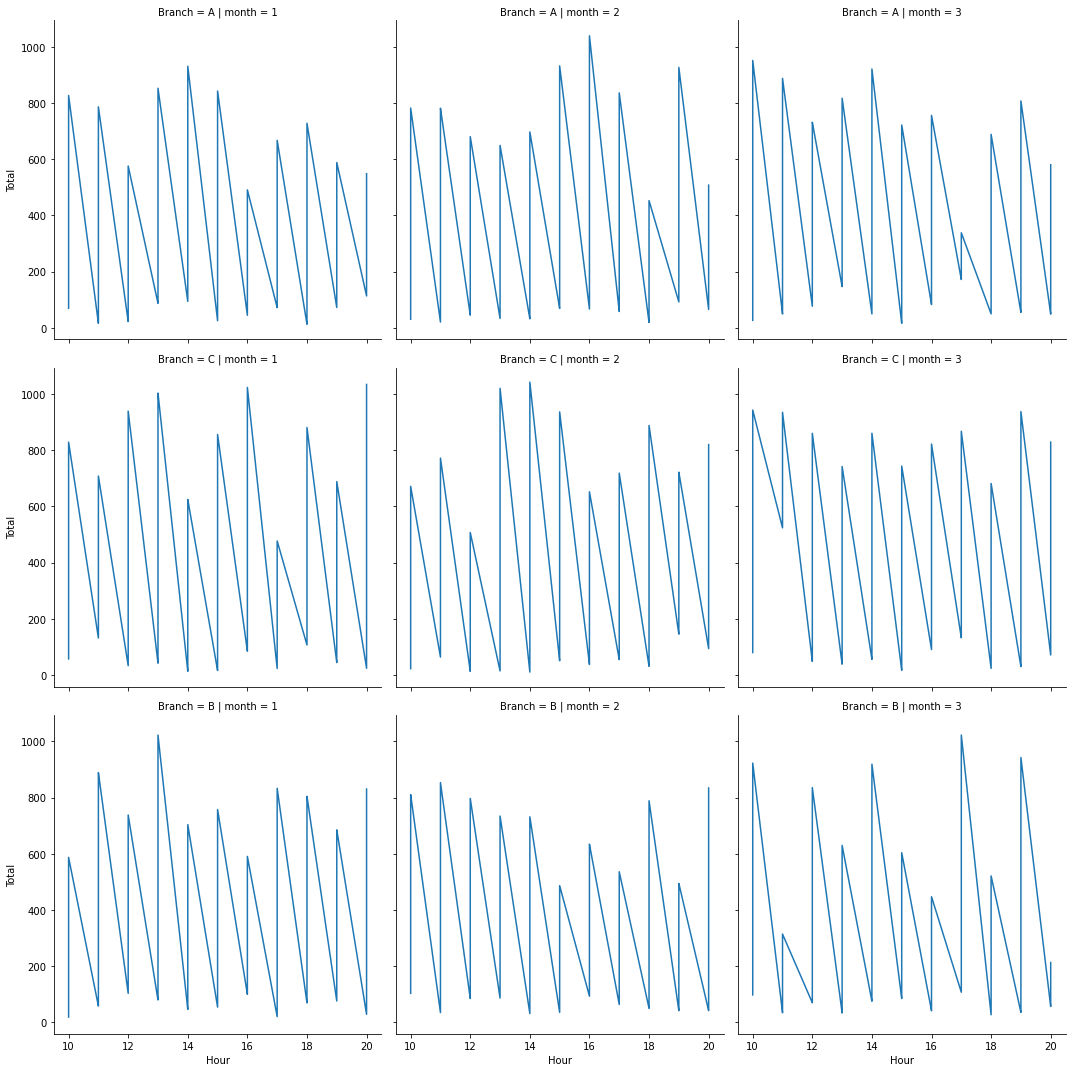

In [60]:
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =df)

In [61]:
df['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

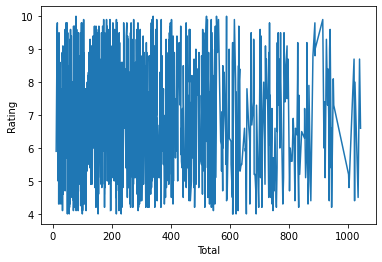

In [62]:
ageDisSpend = sns.lineplot(x="Total", y = "Rating", data =df)

# Product Analysis
Let's look at the various products' performance.

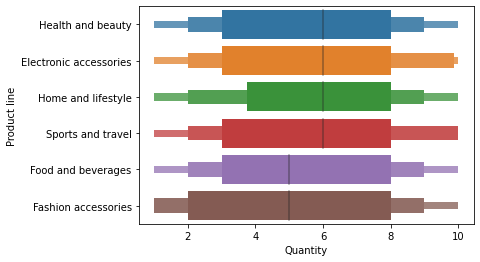

In [63]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=df );

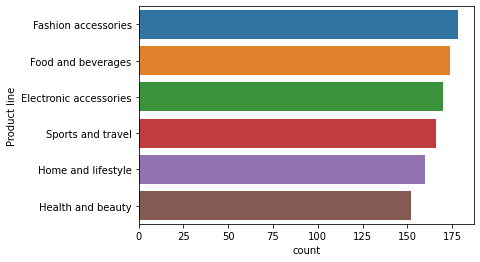

In [64]:
sns.countplot(y = 'Product line', data=df, order = df['Product line'].value_counts().index );

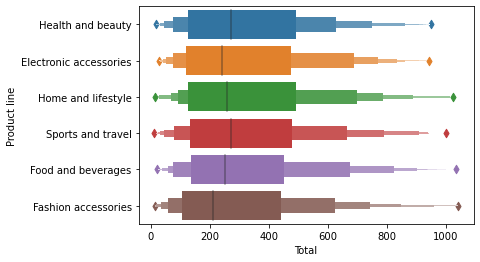

In [65]:
sns.boxenplot(y = 'Product line', x = 'Total', data=df );

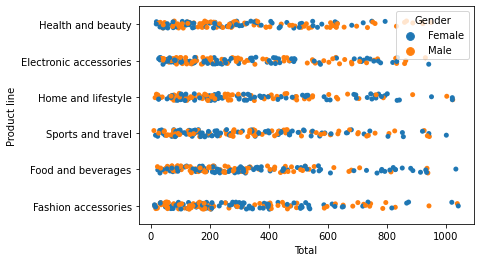

In [66]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=df )

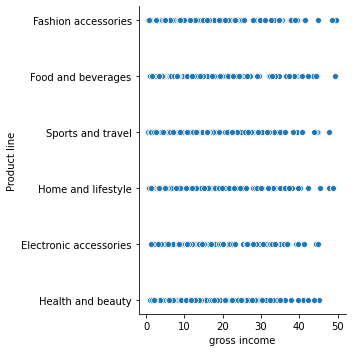

In [67]:
sns.relplot(y = 'Product line', x = 'gross income', data=df)

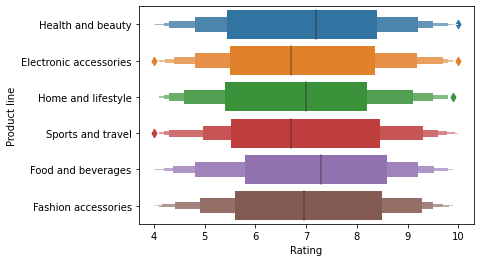

In [68]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=df )

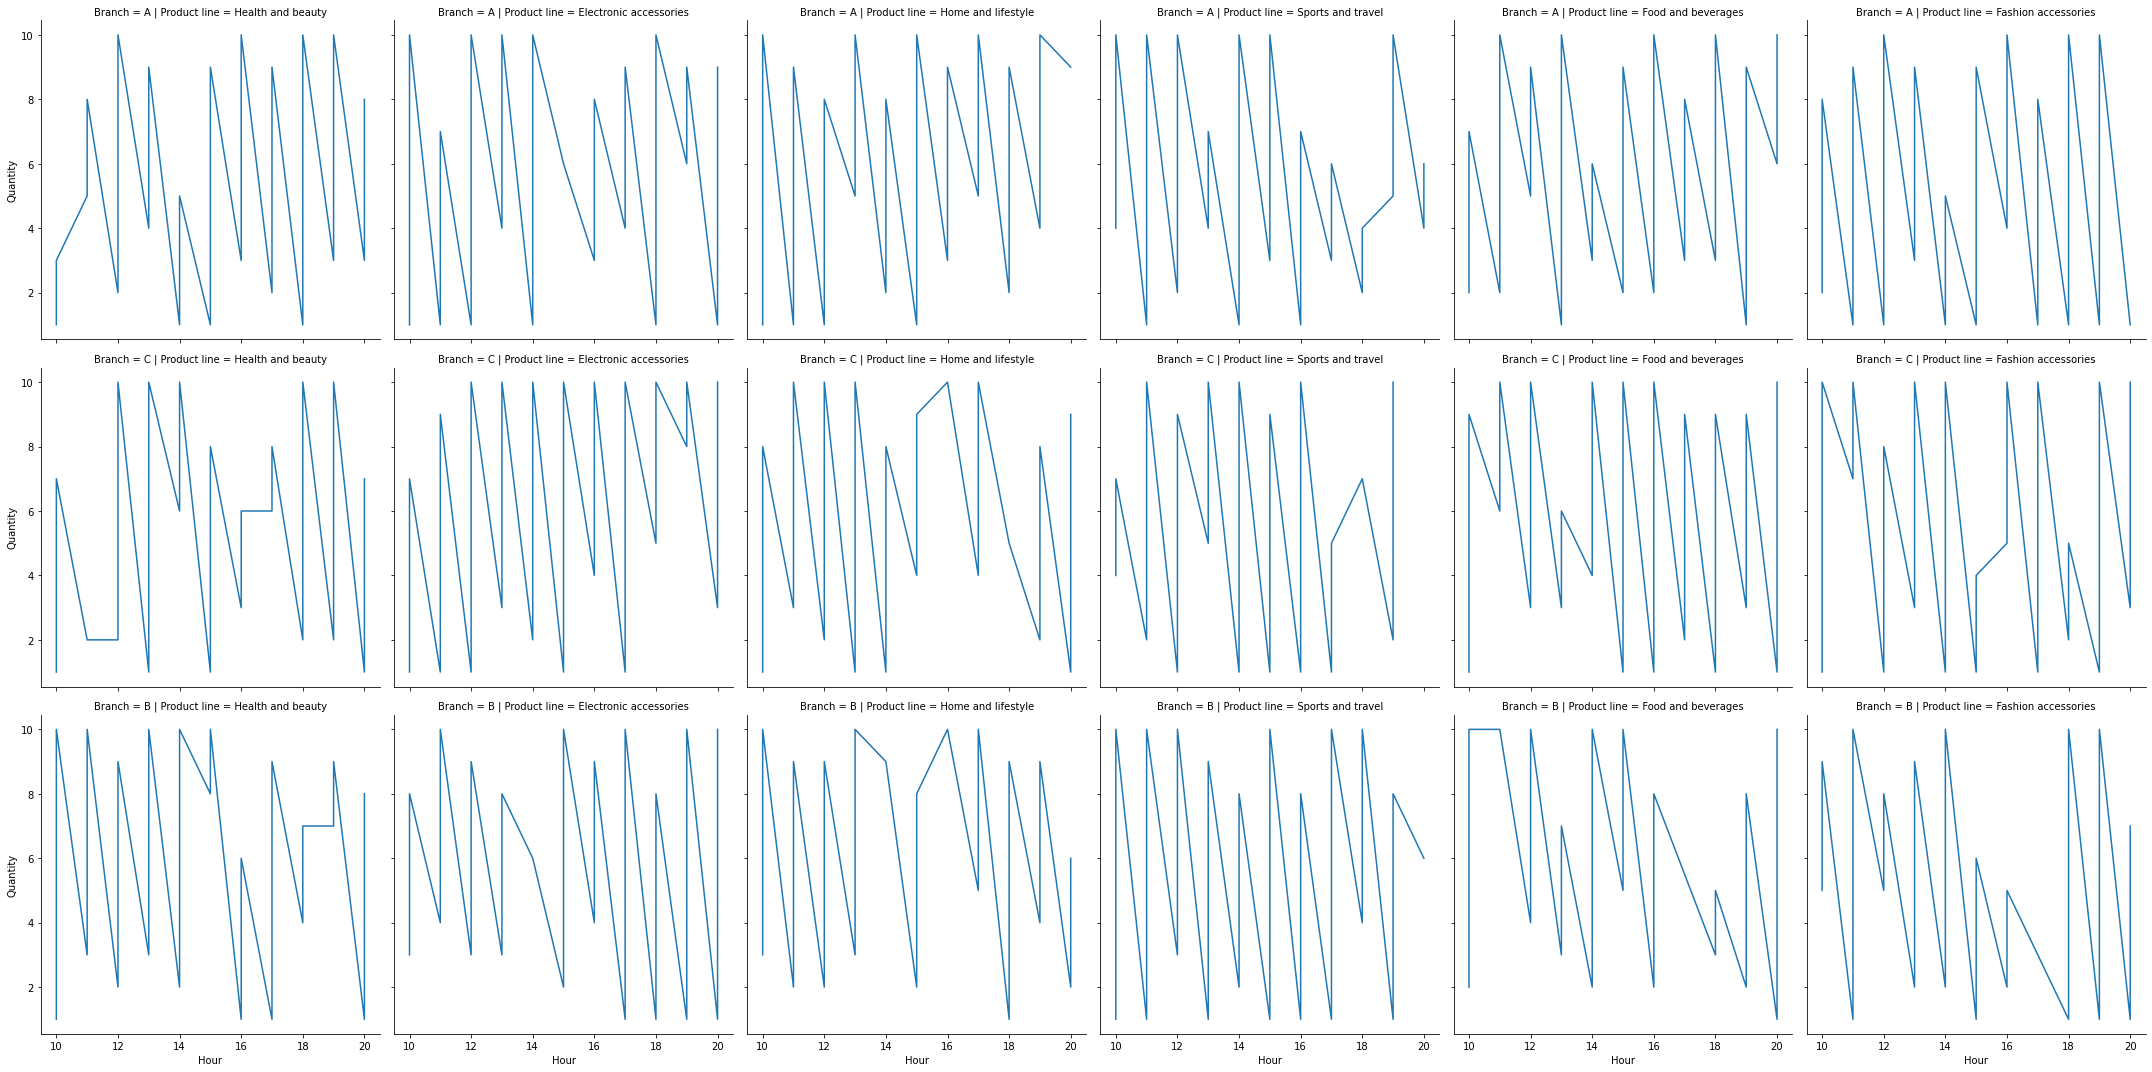

In [69]:
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =df)

# Payment Channel

Let see how customers make payment in this business

Text(0.5, 1.0, 'Payment Channel')

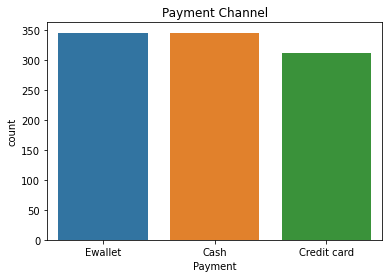

In [70]:
 sns.countplot(x="Payment", data =df).set_title("Payment Channel") 

Text(0.5, 1.0, 'Payment Channel by Branch')

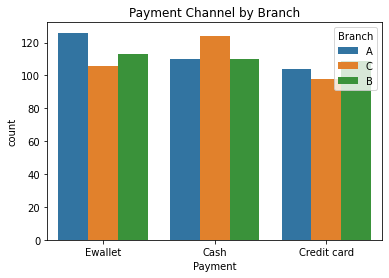

In [71]:
sns.countplot(x="Payment", hue = "Branch", data =df).set_title("Payment Channel by Branch") 

# Customer Analysis

From inspection, there are two types of customers. Members and Normal. Let's see how many they are and where they are 

In [72]:
df['Customer type'].nunique()

2

Text(0.5, 1.0, 'Customer Type')

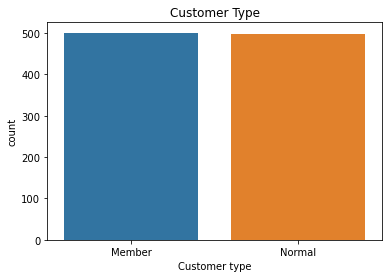

In [73]:
sns.countplot(x="Customer type", data =df).set_title("Customer Type") 

Text(0.5, 1.0, 'Customer Type by Branch')

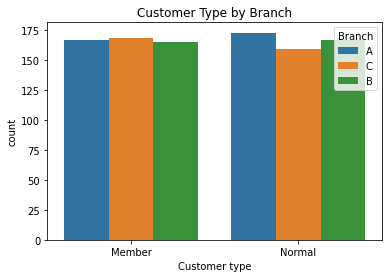

In [74]:
 sns.countplot(x="Customer type", hue = "Branch", data =df).set_title("Customer Type by Branch") 

# Does customer type influences the sales

In [75]:
df.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


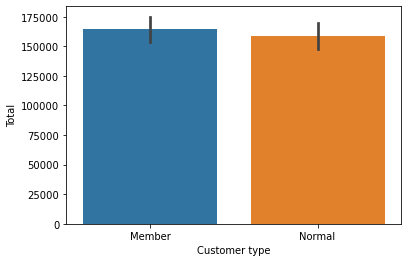

In [76]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=df)

Text(0.5, 1.0, 'Customer Type')

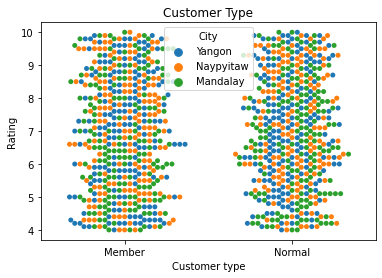

In [77]:
 sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =df).set_title("Customer Type") 

In [78]:
long = {"Yangon": 16.8661, "Naypyitaw": 19.7633, "Mandalay": 21.9588 }
lat = {"Yangon": 96.1951, "Naypyitaw": 96.0785, "Mandalay": 96.0891 }
for set in df:
    df['long'] = df['City'].map(long)
    df['lat'] = df['City'].map(lat)

Text(0.5, 1.0, 'Customer Type')

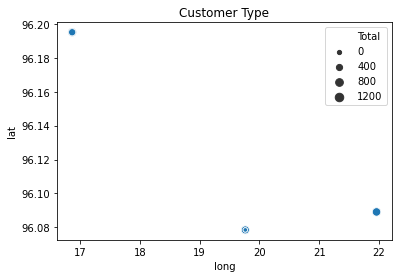

In [79]:
sns.scatterplot(x="long",  y = "lat",size = "Total", data =df, legend = "brief").set_title("Customer Type") 

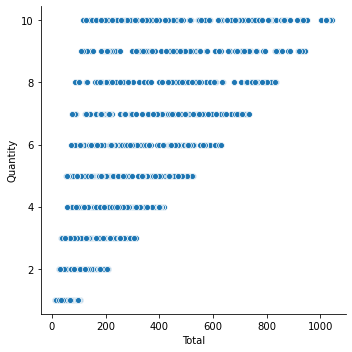

In [80]:
 sns.relplot(x="Total",  y = "Quantity", data =df)